<a href="https://colab.research.google.com/github/olini/alura-ds-series-temporais/blob/main/modulo-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Instalação de pacotes

In [18]:
!pip install seaborn==0.9.0

# 1. Imports

In [36]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1.1. Configs

In [50]:
sns.set(rc={'figure.figsize':(25,12)})

# 2. Carregamento dos dados

In [20]:
alucar = pd.read_csv('alucar.csv')

In [21]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## 2.1. Informações dos dados

In [22]:
print('Número de linhas: ', alucar.shape[0])
print('Número de colunas: ', alucar.shape[1])

Número de linhas:  24
Número de colunas:  2


In [23]:
print('Quantidade de valores NA: ', alucar.isna().sum().sum())

Quantidade de valores NA:  0


In [24]:
print('Tipos das colunas: ')
alucar.dtypes

Tipos das colunas: 


mes       object
vendas     int64
dtype: object

# 3. Transformação dos dados

## 3.1. Coluna *mes* para datetime

In [25]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

# 4. Visualização dos dados

In [53]:
def plot_grafico(x, y, data, titulo, xlabel, ylabel):
  ax = sns.lineplot(x=x, y=y, data=data, marker='o')
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14);

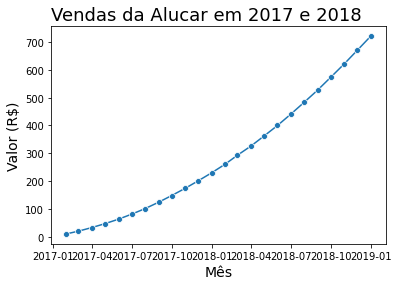

In [40]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar, marker='o')
#ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar em 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Valor (R$)', fontsize=14);

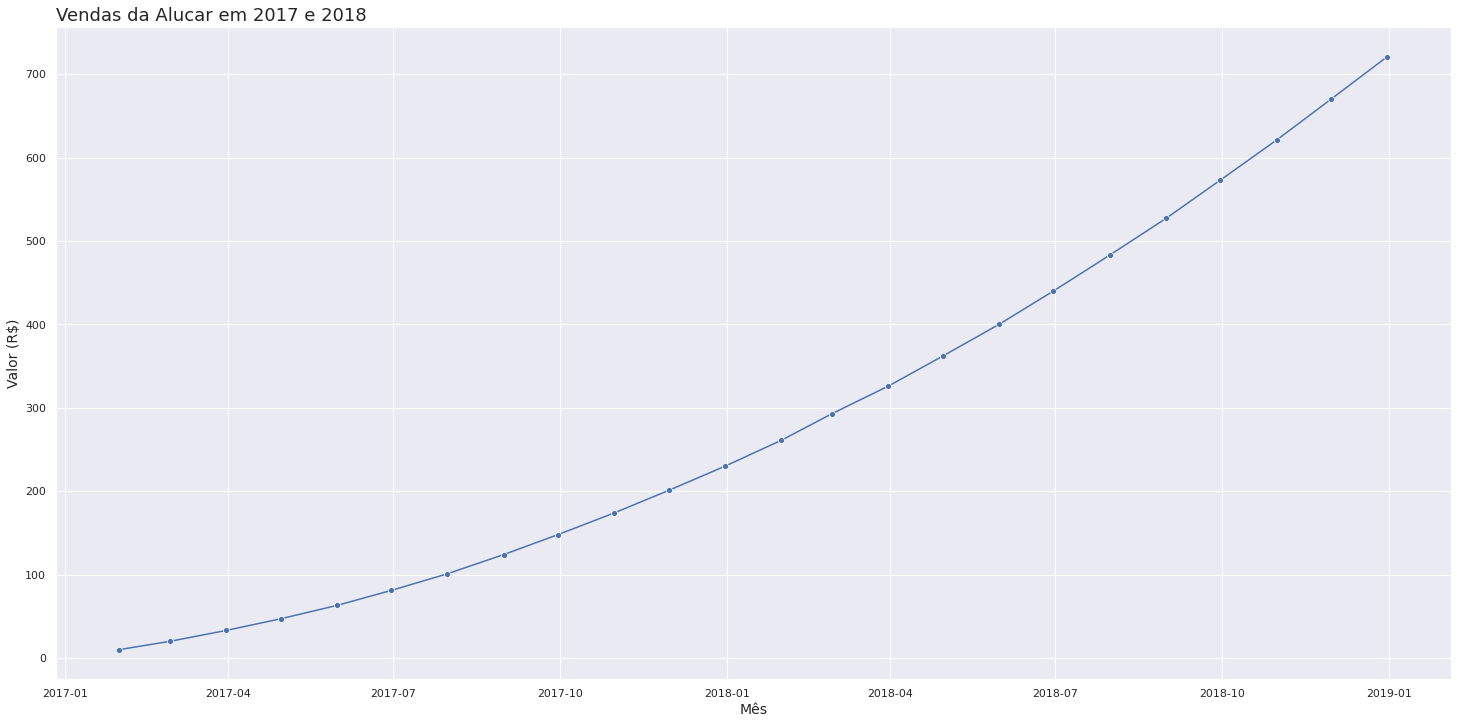

In [54]:
plot_grafico('mes', 'vendas', alucar, 'Vendas da Alucar em 2017 e 2018', 'Mês', 
             'Valor (R$)')

# 5. Decomposição

In [31]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


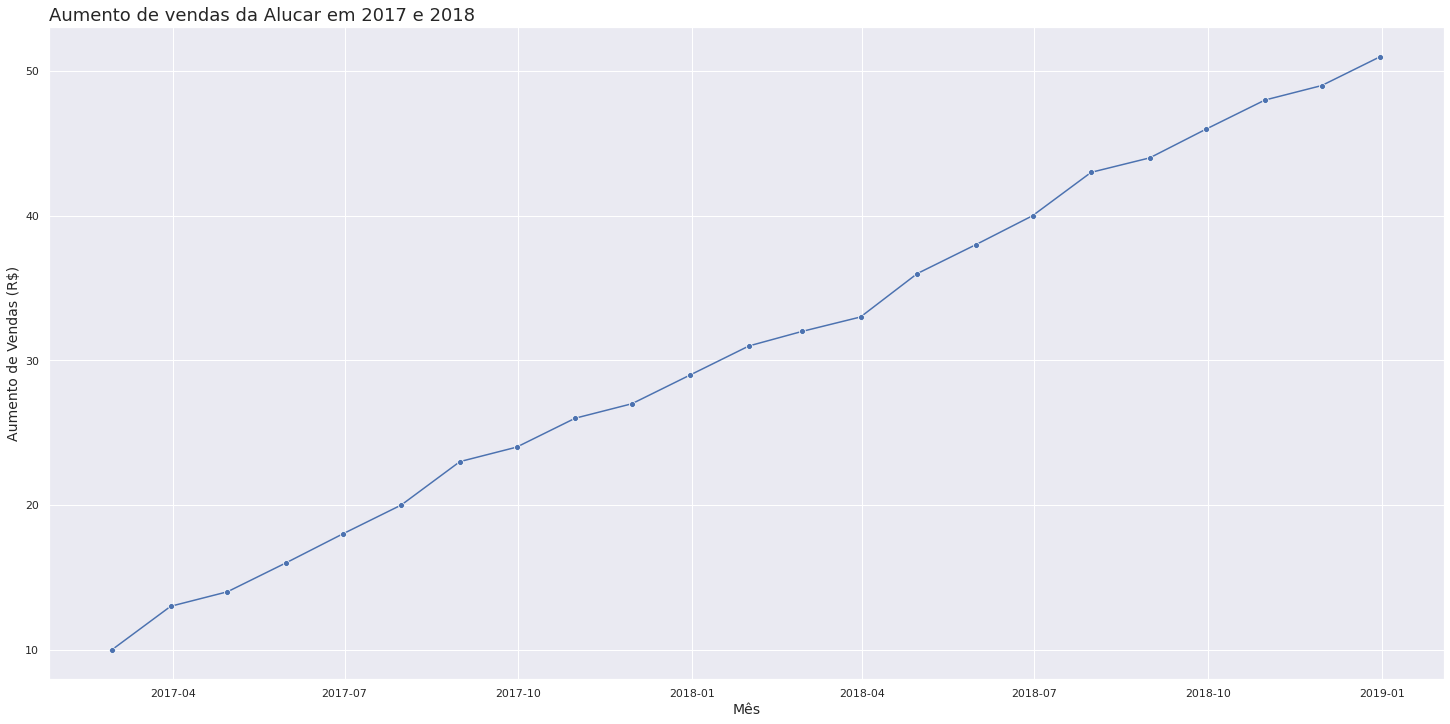

In [55]:
plot_grafico('mes', 'aumento', alucar, 'Aumento de vendas da Alucar em 2017 e 2018', 
             'Mês', 'Aumento de Vendas (R$)')

In [33]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


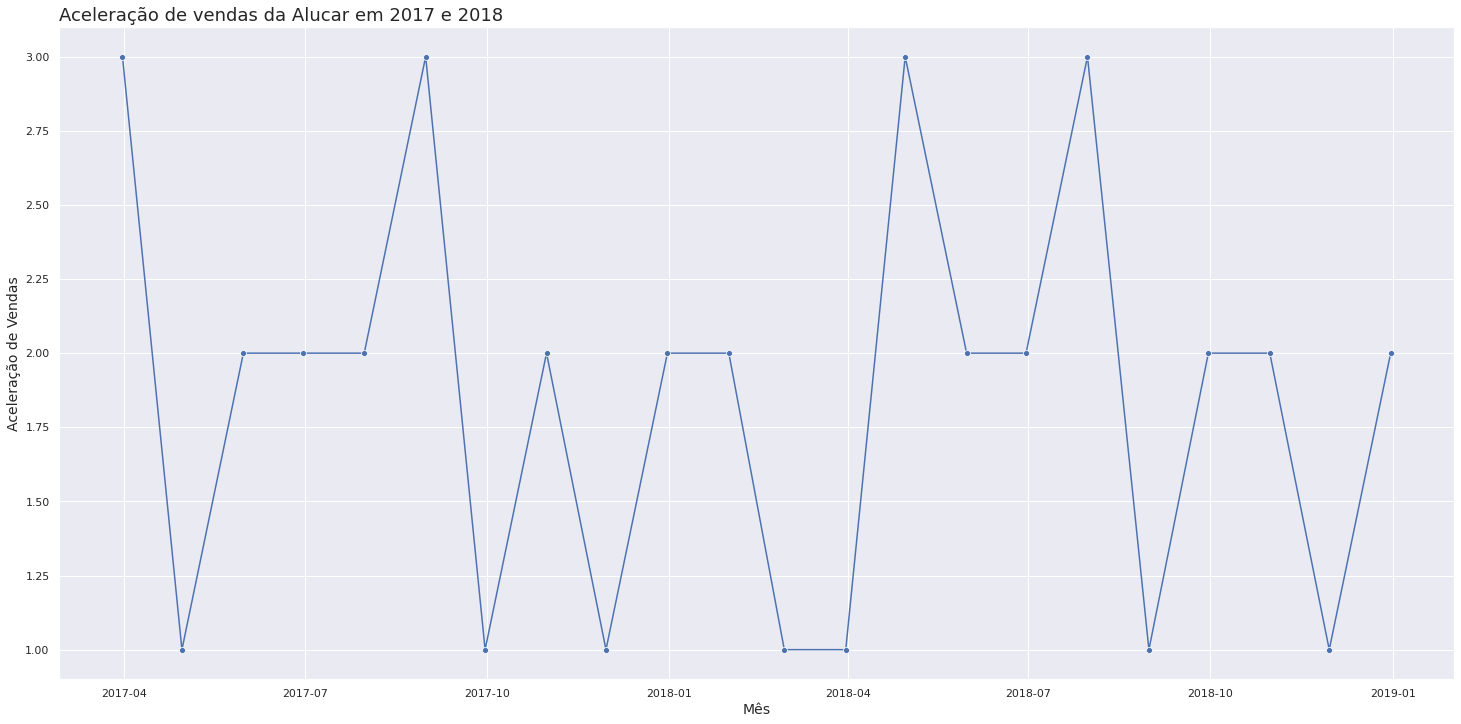

In [56]:
plot_grafico('mes', 'aceleracao', alucar, 'Aceleração de vendas da Alucar em 2017 e 2018', 
             'Mês', 'Aceleração de Vendas')

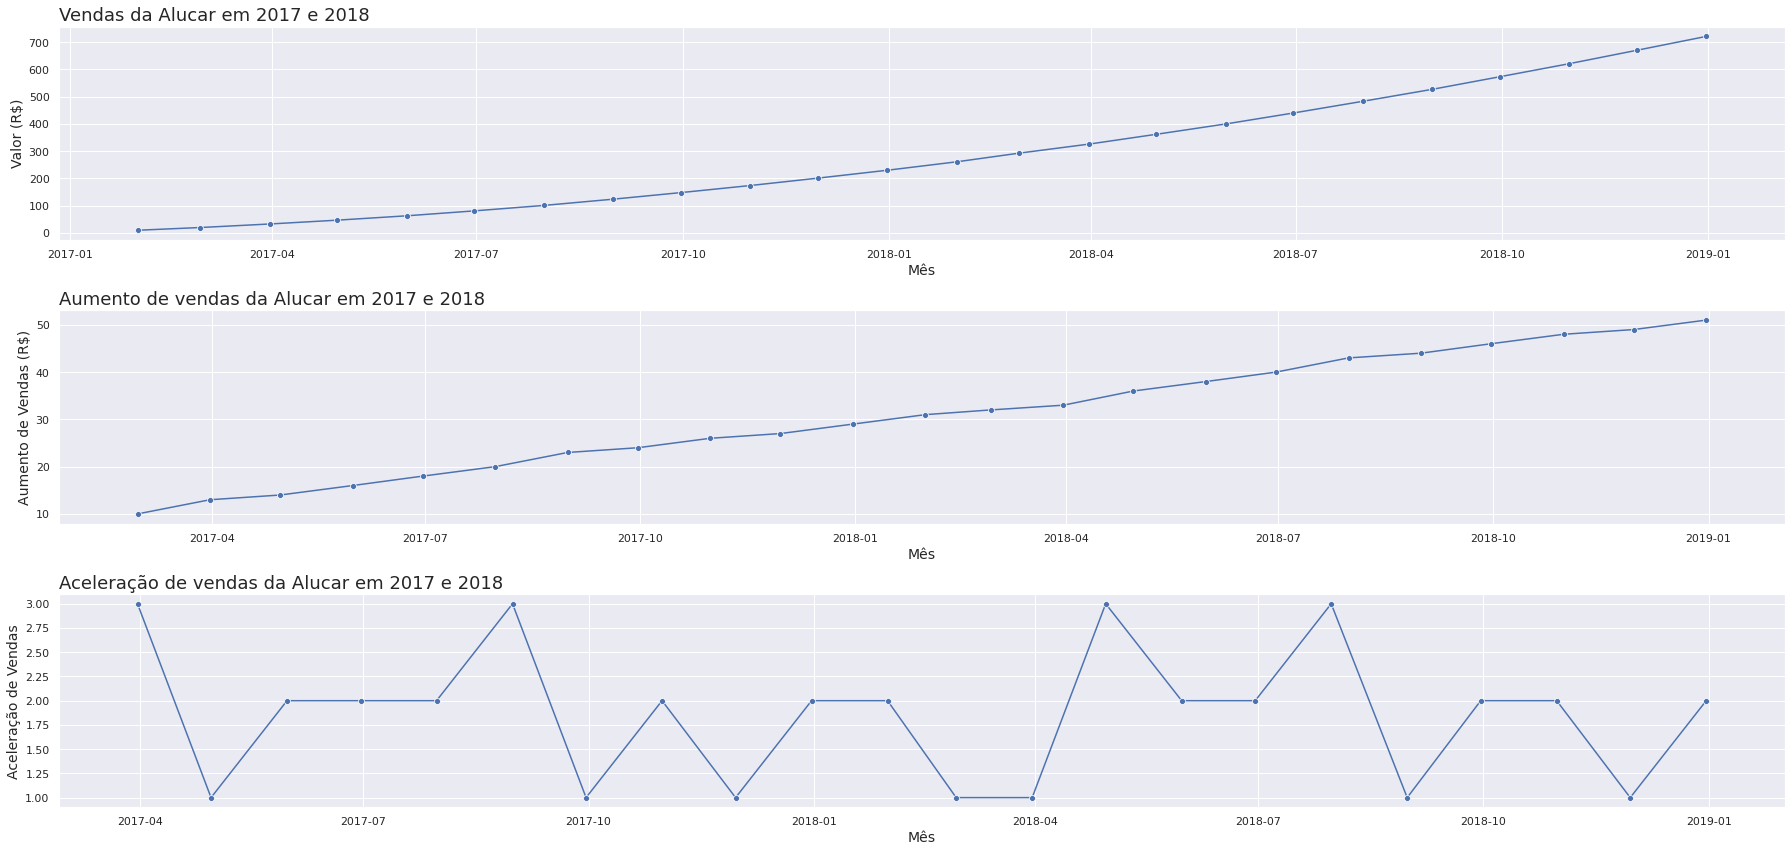

In [61]:
plt.subplot(3, 1, 1)
plot_grafico('mes', 'vendas', alucar, 'Vendas da Alucar em 2017 e 2018', 
             'Mês', 'Valor (R$)')
plt.subplot(3, 1, 2)
plot_grafico('mes', 'aumento', alucar, 'Aumento de vendas da Alucar em 2017 e 2018', 
             'Mês', 'Aumento de Vendas (R$)')
plt.subplot(3, 1, 3)
plot_grafico('mes', 'aceleracao', alucar, 'Aceleração de vendas da Alucar em 2017 e 2018', 
             'Mês', 'Aceleração de Vendas')

plt.tight_layout()